In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

# Build a regression model to predict property crimes.

In [2]:
#grab and process raw data
df = pd.read_excel('data/ucr_crimes.xls')

In [3]:
#name of columns
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [4]:
#rename columns of interest
df.rename(columns={'Violent\ncrime':'Violent_Crime'}, inplace = True) 
df.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'Murder'}, inplace = True) 
df.rename(columns={'Rape\n(revised\ndefinition)1':'Rape_Revised'}, inplace = True) 
df.rename(columns={'Rape\n(legacy\ndefinition)2':'Rape_Legacy'}, inplace = True) 
df.rename(columns={'Aggravated\nassault':'Assault'}, inplace = True) 
df.rename(columns={'Property\ncrime':'Property_Crime'}, inplace = True) 
df.rename(columns={'Larceny-\ntheft':'Theft'}, inplace = True) 
df.rename(columns={'Motor\nvehicle\ntheft':'Motor_Theft'}, inplace = True) 
df.rename(columns={'Arson3':'Arson'}, inplace = True) 

In [5]:
#see the counts to determine if we're missing any data
df.count()

City              348
Population        348
Violent_Crime     348
Murder            348
Rape_Revised        0
Rape_Legacy       348
Robbery           348
Assault           348
Property_Crime    348
Burglary          348
Theft             348
Motor_Theft       348
Arson             187
dtype: int64

In [6]:
#drop column due to no values
#drop column due to only having 53% of records
df=df.drop('Rape_Revised', 1)
df=df.drop('Arson', 1)

In [7]:
#view top five rows
df.head(5)

,City,Population,Violent_Crime,Murder,Rape_Legacy,Robbery,Assault,Property_Crime,Burglary,Theft,Motor_Theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


In [8]:
#view correlations
df.corr()

,Population,Violent_Crime,Murder,Rape_Legacy,Robbery,Assault,Property_Crime,Burglary,Theft,Motor_Theft
Population,1.000000,0.998854,0.986758,0.990839,0.998469,0.999134,0.996265,0.970578,0.997946,0.992421
Violent_Crime,0.998854,1.000000,0.992098,0.994985,0.999923,0.999942,0.998059,0.978150,0.998762,0.996271
Murder,0.986758,0.992098,1.000000,0.997746,0.993104,0.990843,0.995403,0.993733,0.993175,0.997992
Rape_Legacy,0.990839,0.994985,0.997746,1.000000,0.995438,0.994140,0.997843,0.992442,0.996260,0.998764
Robbery,0.998469,0.999923,0.993104,0.995438,1.000000,0.999742,0.998237,0.979525,0.998735,0.996927
Assault,0.999134,0.999942,0.990843,0.994140,0.999742,1.000000,0.997622,0.976288,0.998561,0.995403
Property_Crime,0.996265,0.998059,0.995403,0.997843,0.998237,0.997622,1.000000,0.987137,0.999666,0.998302
Burglary,0.970578,0.978150,0.993733,0.992442,0.979525,0.976288,0.987137,1.000000,0.982700,0.991464
Theft,0.997946,0.998762,0.993175,0.996260,0.998735,0.998561,0.999666,0.982700,1.000000,0.996878
Motor_Theft,0.992421,0.996271,0.997992,0.998764,0.996927,0.995403,0.998302,0.991464,0.996878,1.000000


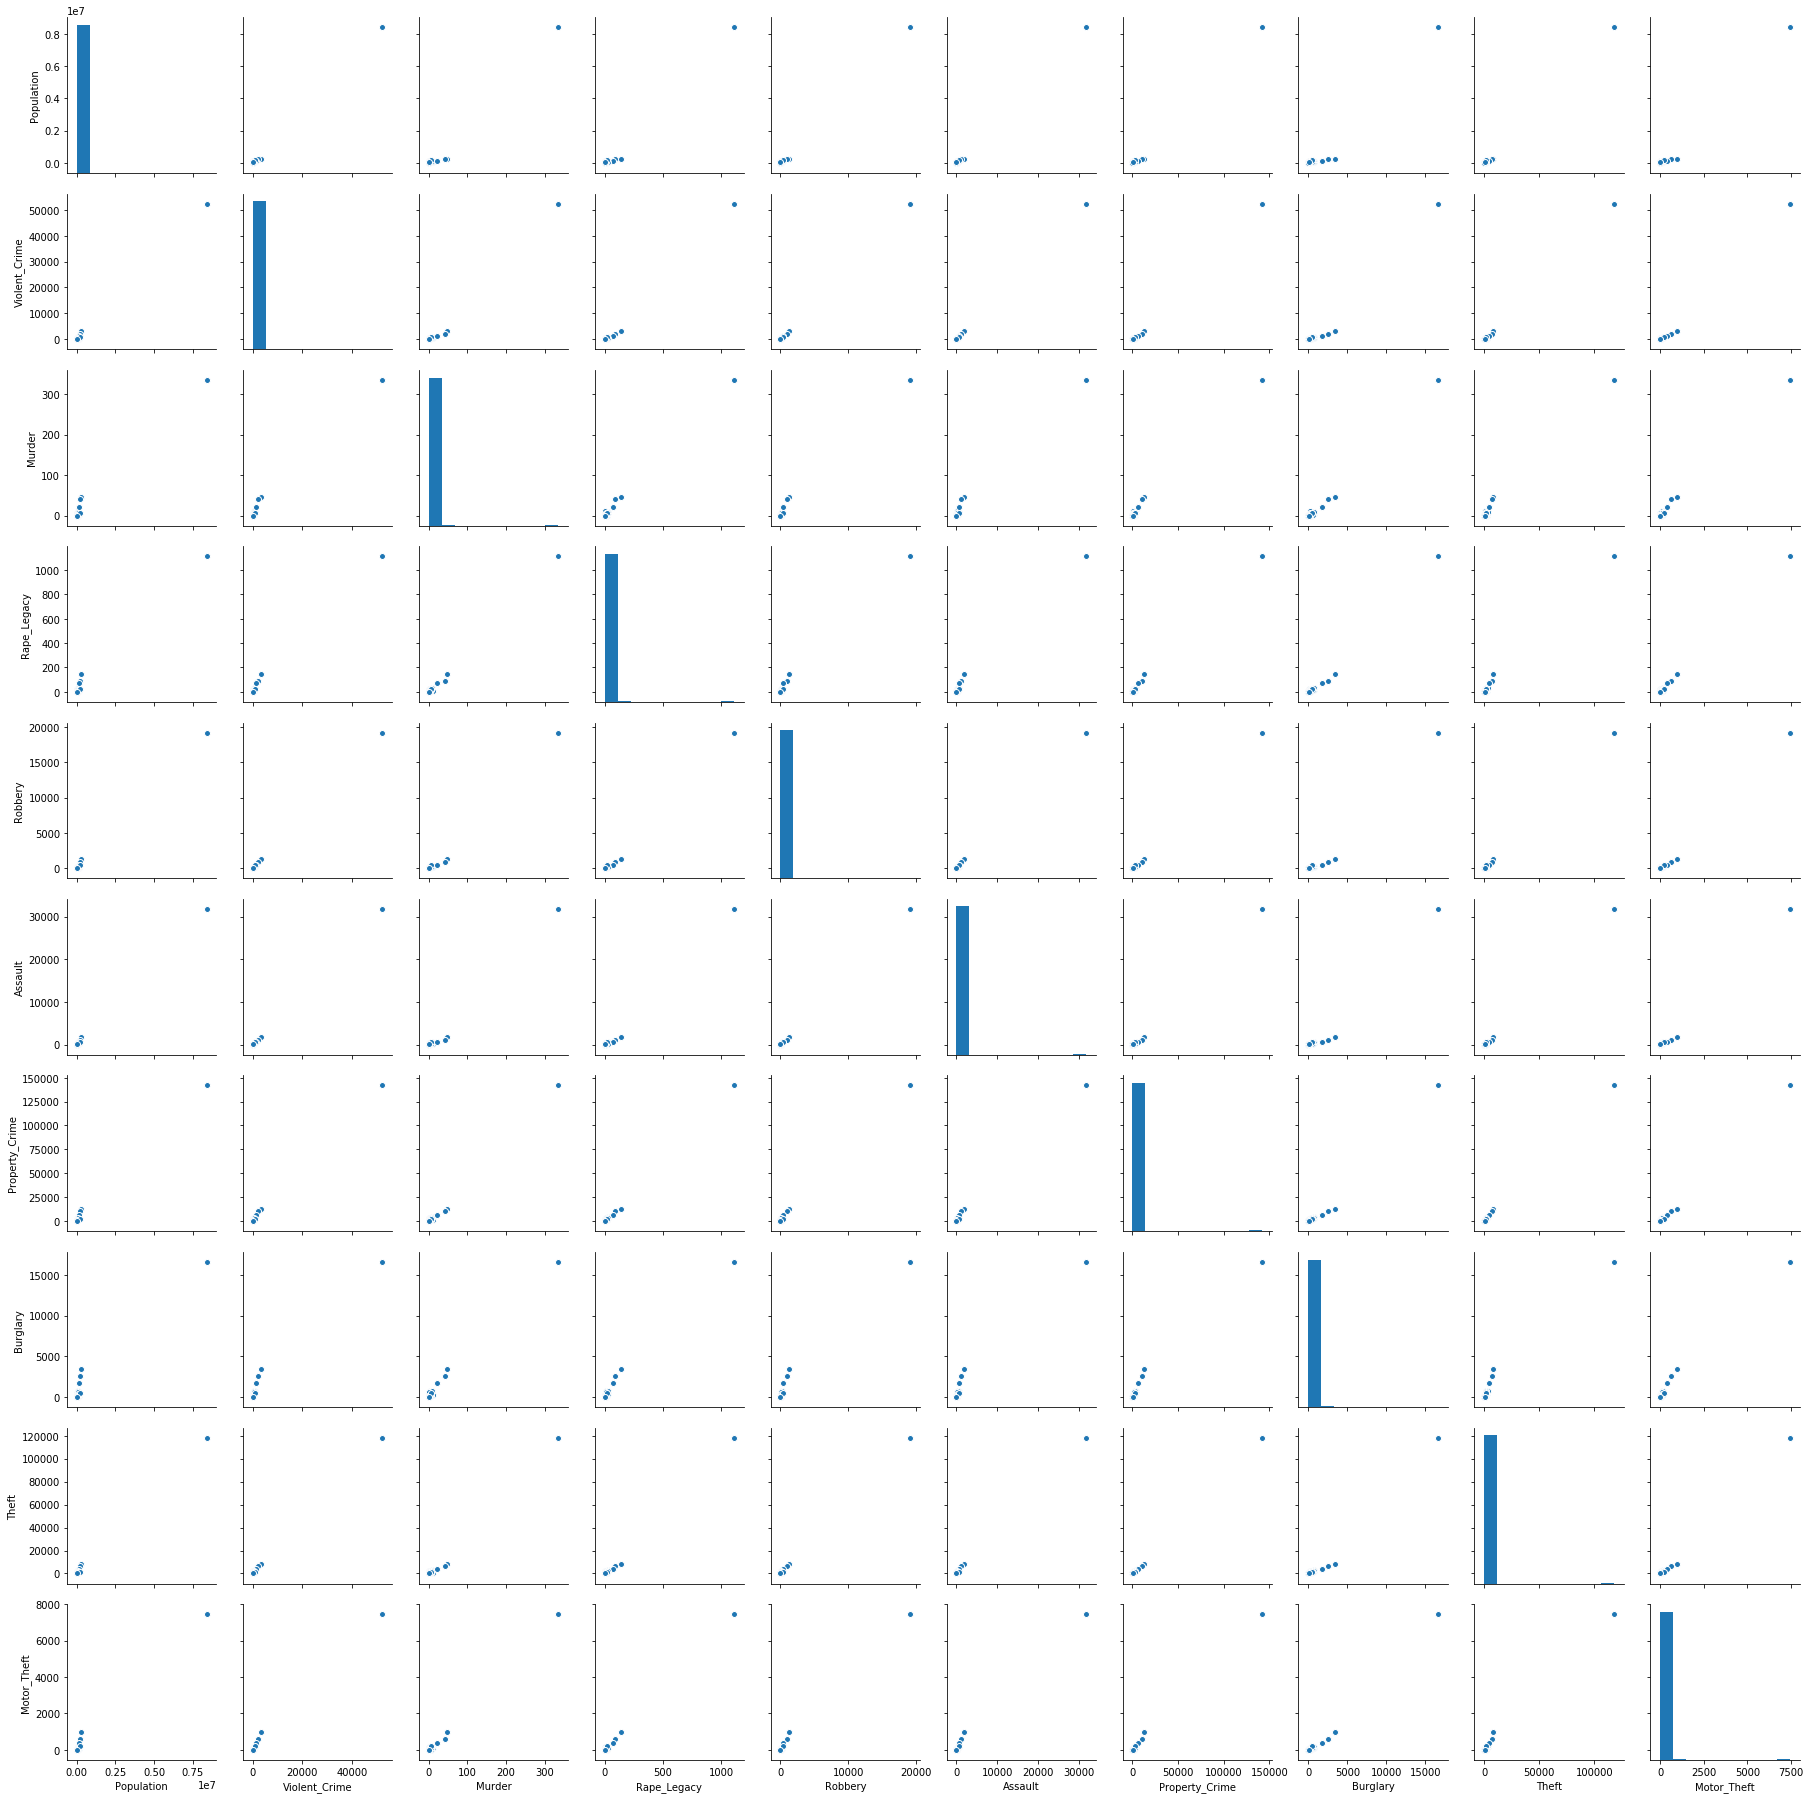

In [9]:
sns.pairplot(df)

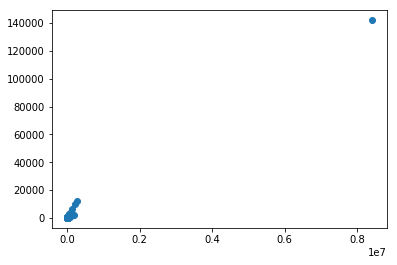

In [10]:
#Test the four assumptions
#assumption 1 - linear relationship
plt.scatter(df['Population'], df['Property_Crime'])

In [11]:
#Drop the one outlier
df = df.drop(df['Population'].idxmax())

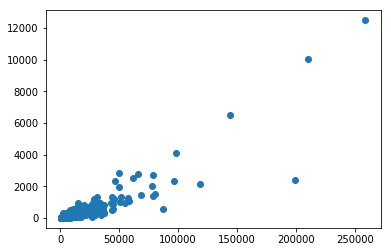

In [12]:
plt.scatter(df['Population'], df['Property_Crime'])

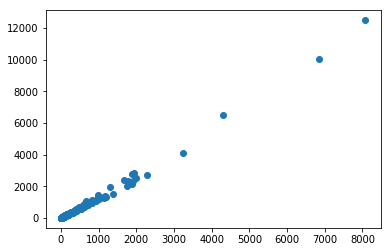

In [13]:
plt.scatter(df['Theft'], df['Property_Crime'])

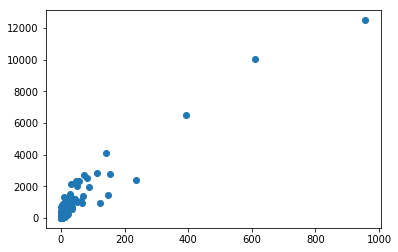

In [14]:
plt.scatter(df['Motor_Theft'], df['Property_Crime'])

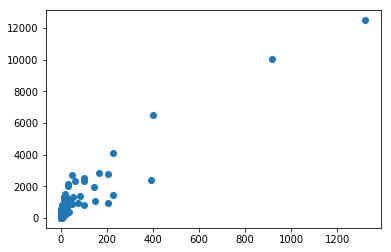

In [15]:
plt.scatter(df['Robbery'], df['Property_Crime'])

In [16]:
#Add dummy variables for Theft, Motor Theft, Robbery since these have the highest associations with property crime

df['Theft_dummy'] = np.where((df['Theft']>0), 1,0)
df['Motor_Theft_dummy'] = np.where((df['Motor_Theft']>0), 1,0)
df['Robbery_dummy'] = np.where((df['Robbery']>0), 1,0)

#View top 5 rows with newly added dummy variables
df.head(5)

,City,Population,Violent_Crime,Murder,Rape_Legacy,Robbery,Assault,Property_Crime,Burglary,Theft,Motor_Theft,Theft_dummy,Motor_Theft_dummy,Robbery_dummy
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,1,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,1,1,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,1,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,1,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,1,1,1


In [17]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = df['Property_Crime'].values.reshape(-1, 1)
X = df[['Population','Theft_dummy','Motor_Theft_dummy','Robbery_dummy']]
regr.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.46479493e-02 -2.51259732e+01 -8.37041696e+01 -6.09222671e+01]]

Intercept: 
 [-44.70643831]

R-squared:
0.789986585800087


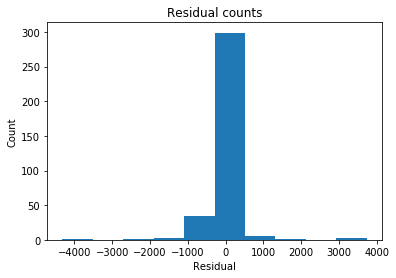

In [18]:
#Assumption two - multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property_Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

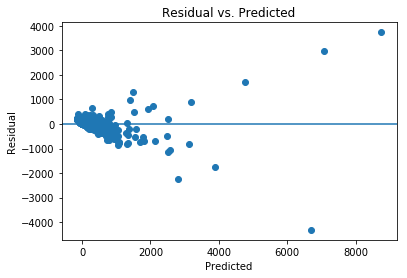

In [19]:
#Assumption three - homoscedascity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [20]:
#assumption four - low multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Theft_dummy,Motor_Theft_dummy,Robbery_dummy
Population,1.000000,0.077801,0.268117,0.344347
Theft_dummy,0.077801,1.000000,0.237129,0.175523
Motor_Theft_dummy,0.268117,0.237129,1.000000,0.448084
Robbery_dummy,0.344347,0.175523,0.448084,1.000000
